In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from trainer.utils import losses
from trainer.models.transformer import transformer_model

In [2]:
print(tfds.core.Version)
tfds.__version__

<class 'tensorflow_datasets.core.utils.version.Version'>


'1.2.0'

In [3]:
# coco_dataset = tfds.load('coco/2014', split=tfds.Split.TRAIN, data_dir='gs://duke-tfds')
# dlconfig = tfds.download.DownloadConfig(download_mode=tfds.download.GenerateMode.REUSE_CACHE_IF_EXISTS,
#                                         max_examples_per_split=6300)
# coco_dataset = tfds.load('coco/2014', split=tfds.Split.TRAIN,
#                          shuffle_files=False,
#                          download=True,
#                          download_and_prepare_kwargs=
#                          {
#                              'download_config': dlconfig
#                          })
coco_dataset = tfds.load('coco/2014', split=tfds.Split.TRAIN)
# image_net = tfds.load('imagenet2012', split=tfds.Split.TRAIN)
def resize_and_pair(ele):
  image = ele['image']

  image = tf.image.resize(image, (256, 256))
  # image = (image - tf.reduce_min(image))/(tf.reduce_max(image)-tf.reduce_min(image))
  return image, image
images = coco_dataset.map(resize_and_pair, num_parallel_calls=tf.data.experimental.AUTOTUNE)
images = images.batch(4).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

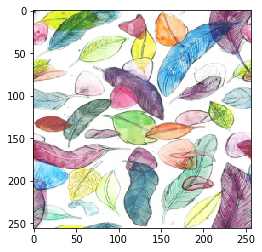

In [17]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

la_muse = load_img('images/styles/la_muse.jpg')
la_muse = tf.image.resize(la_muse, [256, 256])
scream =load_img('images/styles/the_scream.jpg')
scream = tf.image.resize(scream, [256, 256])
feathers =load_img('images/styles/feathers.jpg')
feathers = tf.image.resize(feathers, [256, 256])
candy =load_img('images/styles/candy.jpg')
candy = tf.image.resize(candy, [256, 256])
composition =load_img('images/styles/composition_vii.jpg')
composition = tf.image.resize(composition, [256, 256])
udnie =load_img('images/styles/udnie.jpg')
udnie = tf.image.resize(udnie, [256, 256])
imshow(feathers.numpy().astype('uint8'))

In [5]:
model = 1
model = transformer_model()

created


In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(udnie))

In [5]:
model = transformer_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(la_muse))
model.fit(images, epochs=15, steps_per_epoch=None, use_multiprocessing=False)
model.save('musein_resizestyle_sw5_cw1_tv1e-4_coco.h5')

model = transformer_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(feathers))
model.fit(images, epochs=15, steps_per_epoch=None, use_multiprocessing=False)
model.save('feathersin_resizestyle_sw5_cw1_tv1e-4_coco.h5')

model = transformer_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(candy))
model.fit(images, epochs=15, steps_per_epoch=None, use_multiprocessing=False)
model.save('candyin_resizestyle_sw5_cw1_tv1e-4_coco.h5')

model = transformer_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(composition))
model.fit(images, epochs=15, steps_per_epoch=None, use_multiprocessing=False)
model.save('compositionin_resizestyle_sw5_cw1_tv1e-4_coco.h5')

created
Epoch 1/15
1575/1575 [==============================] - 394s 250ms/step - loss: 1193603.6416
Epoch 2/15
1575/1575 [==============================] - 380s 241ms/step - loss: 469993.3907
Epoch 3/15
1575/1575 [==============================] - 380s 241ms/step - loss: 421115.7443
Epoch 4/15
1575/1575 [==============================] - 380s 241ms/step - loss: 397991.9899
Epoch 5/15
1575/1575 [==============================] - 380s 241ms/step - loss: 383335.4831
Epoch 6/15
1575/1575 [==============================] - 380s 241ms/step - loss: 373350.1197
Epoch 7/15
1575/1575 [==============================] - 379s 241ms/step - loss: 364568.2721
Epoch 8/15
1575/1575 [==============================] - 379s 241ms/step - loss: 358235.1976
Epoch 9/15
1575/1575 [==============================] - 379s 241ms/step - loss: 353572.6827
Epoch 10/15
1575/1575 [==============================] - 380s 241ms/step - loss: 349058.0424
Epoch 11/15
1575/1575 [==============================] - 380s 241ms/st

In [22]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss=losses.full_loss(la_muse))
model.fit(images, epochs=50, steps_per_epoch=None, use_multiprocessing=False)

Epoch 1/50
1575/1575 [==============================] - 390s 248ms/step - loss: 451750.1389
Epoch 2/50
  12/1575 [..............................] - ETA: 6:28 - loss: 450894.4290

KeyboardInterrupt: 

In [ ]:
image_iterator = iter(images)
x, y = next(image_iterator)
# x, y = next(image_iterator)
plt.imshow(x.numpy()[0].astype(np.uint8))
print(np.max(x.numpy()[0]), np.min(x.numpy()[0]))


In [ ]:
results = model.predict(x, batch_size=4)
plt.imshow(results[0].astype(np.uint8))
print(np.max(results[0]), np.min(results[0]))

In [21]:
model.save('musein_resizestyle_sw10_cw1_tv1e-4_coco.h5')

In [18]:
model.load_weights('musein_resizestyle_sw10_cw1_tv1e-4_coco.h5')

254.22638 0.07826996


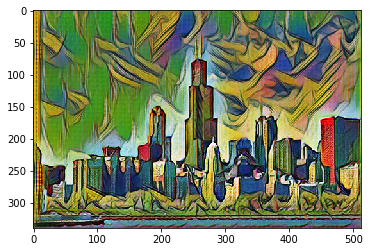

In [9]:
chicago = load_img('images/chicago.jpg')
img_shape = chicago.shape
chicago = tf.broadcast_to(chicago, [4, img_shape[1], img_shape[2], img_shape[3]])
# chicago = tf.image.resize(chicago, [256, 256])
results = model.predict(chicago)
plt.imshow(results[0].astype(np.uint8))
print(np.max(results[0]), np.min(results[0]))

254.7868 0.07644653


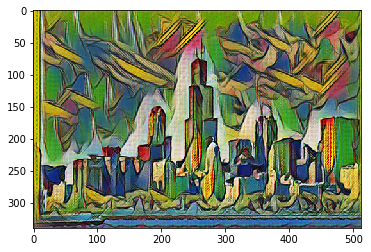

In [20]:
chicago = load_img('images/chicago.jpg')
# chicago = tf.image.resize(chicago, [256, 256])
results = model.predict(chicago)
plt.imshow(results[0].astype(np.uint8))
print(np.max(results[0]), np.min(results[0]))

246.0075 0.44322968


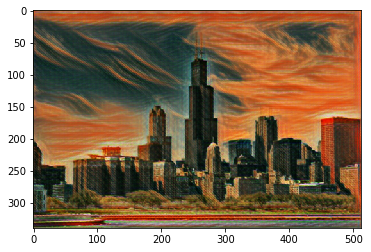

In [12]:
chicago = load_img('images/chicago.jpg')
# imshow(chicago)
# chicago = tf.image.resize(chicago, [256, 256])
results = model.predict(chicago)
# imshow(chicago)
plt.imshow(results[0].astype(np.uint8))
print(np.max(results[0]), np.min(results[0]))

In [21]:
results = tf.dtypes.cast(results[0], tf.uint8)
encoded_str = tf.image.encode_jpeg(tf.squeeze(results),quality=100)
tf.io.write_file('images/outputs/abhi_muse.jpg', encoded_str)

254.33145 0.055747986


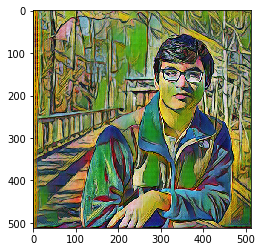

In [20]:
lil = load_img('images/input/abhi.jpg')
img_shape = lil.shape
lil = tf.broadcast_to(lil, [4, img_shape[1], img_shape[2], img_shape[3]])
# imshow(chicago)
# chicago = tf.image.resize(chicago, [256, 256])
results = model.predict(lil, batch_size=4)
# imshow(chicago)
plt.imshow(results[0].astype(np.uint8))
print(np.max(results[0]), np.min(results[0]))